# Binary Read-Write Tests real 001 #
<p>Binary file and wav file read/write tests for real-valued signals.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# do not use wavio for writing, it scales and removes dc offset automatically
import scipy.io.wavfile as scwav

In [2]:
%matplotlib notebook
fsz = (7, 4)   # figure size
fsz2 = (fsz[0], 1.2*fsz[1]/2.0)   # half height figure

In [3]:
# Generate real-valued sinusoid 1
Fs1 = 44100   # sampling rate
tlen1 = 1     # duration
ttx1 = np.arange(round(tlen1*Fs1))/float(Fs1)  # time axis
A1 = 1.0      # amplitude
offs1 = 0     # offset
f1 = 200      # frequency in Hz
theta1 = -90  # phase
x1t = A1*np.cos(2*np.pi*f1*ttx1 + np.pi/180*theta1) + offs1  # sinusoid
print(type(x1t), x1t.dtype, x1t.size)

<class 'numpy.ndarray'> float64 44100


In [4]:
# Save sinusoid 1 to file using 64-bit floats
x1t = np.array(x1t, float)
print(type(x1t), x1t.dtype, x1t.size)
fn1 = 'sig_x1t_float64_Fs44100.bin'
x1t.tofile(fn1)

<class 'numpy.ndarray'> float64 44100


<p>File Size: 8 x 44100 x 1 = 352800 bytes (8 bytes or 64 bits per sample).</p>

<class 'numpy.ndarray'> float64 44100


<IPython.core.display.Javascript object>


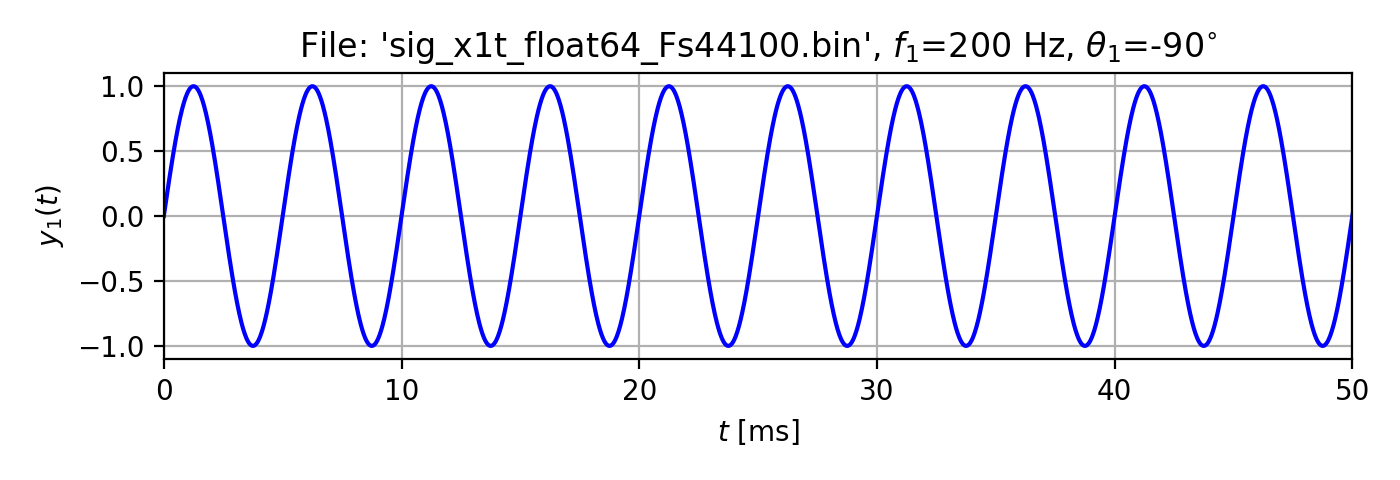

In [5]:
# Read back and display sinusoid 1
y1t = np.fromfile(fn1, dtype=float)
print(type(y1t), y1t.dtype, y1t.size)
tty1 = np.arange(y1t.size)/float(Fs1)
plt.figure(3, figsize=fsz2)
plt.plot(1e3*tty1, y1t, '-b')
plt.xlim([0, 50])
plt.title("File: '{}', $f_1$={} Hz, $\\theta_1$={}$^{{\\circ}}$".format(fn1, f1, theta1))
plt.ylabel('$y_1(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()

In [6]:
# Generate real-valued sinusoid 2
Fs2 = 32000   # sampling rate
tlen2 = 2     # duration
ttx2 = np.arange(round(tlen2*Fs2))/float(Fs2)  # time axis
A2 = 0.7      # amplitude
offs2 = 0     # offset
f2 = 500      # frequency in Hz
theta2 = 0    # phase
x2t = A2*np.cos(2*np.pi*f2*ttx2 + np.pi/180*theta2) + offs2  # sinusoid
print(type(x2t), x2t.dtype, x2t.size)

<class 'numpy.ndarray'> float64 64000


In [7]:
# Save sinusoid 2 to file using 32-bit floats
x2t = np.array(x2t, np.float32)
print(type(x2t), x2t.dtype, x2t.size)
fn2 = 'sig_x2t_float32_Fs32000.bin'
x2t.tofile(fn2)

<class 'numpy.ndarray'> float32 64000


<p>File Size: 4 x 32000 x 2 = 256000 bytes (4 bytes or 32 bits per sample).</p>

<class 'numpy.ndarray'> float32 64000


<IPython.core.display.Javascript object>


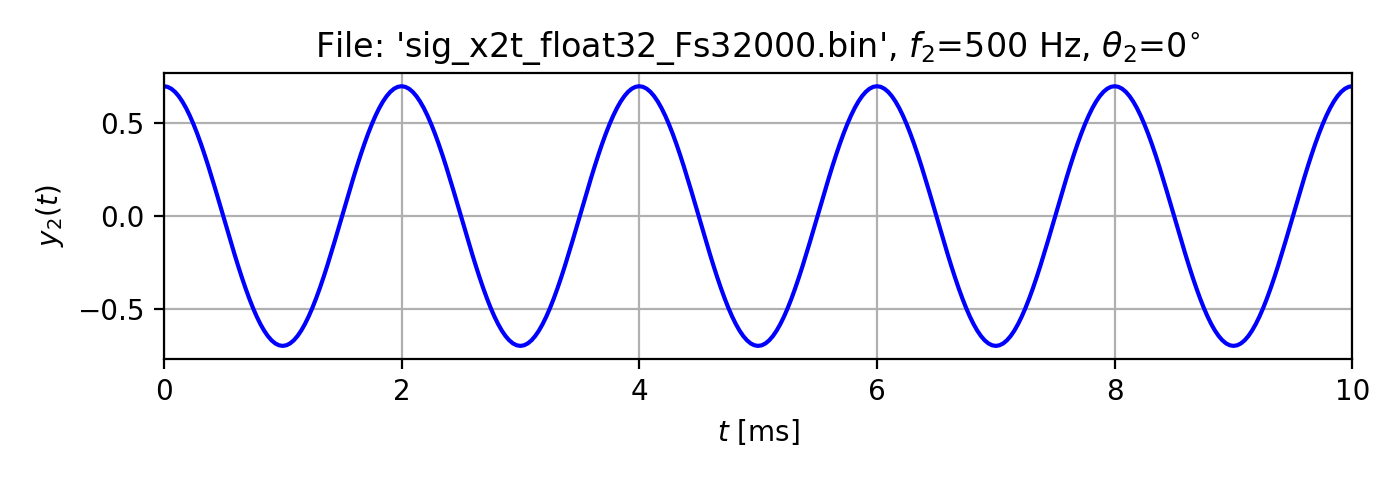

In [8]:
# Read back and display sinusoid 2
y2t = np.fromfile(fn2, dtype=np.float32)
print(type(y2t), y2t.dtype, y2t.size)
tty2 = np.arange(y2t.size)/float(Fs2)
plt.figure(7, figsize=fsz2)
plt.plot(1e3*tty2, y2t, '-b')
plt.xlim([0, 10])
plt.title("File: '{}', $f_2$={} Hz, $\\theta_2$={}$^{{\\circ}}$".format(fn2, f2, theta2))
plt.ylabel('$y_2(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()

In [9]:
# Generate real-valued sinusoid 3, note the deliberate dc offset
Fs3 = 22050   # sampling rate
tlen3 = 1     # duration
ttx3 = np.arange(round(tlen3*Fs3))/float(Fs3)  # time axis
A3 = 0.499    # amplitude
offs3 = 0.5   # offset
f3 = 300      # frequency in Hz
theta3 = 45   # phase
x3t = A3*np.cos(2*np.pi*f3*ttx3 + np.pi/180*theta3) + offs3  # sinusoid
print(type(x3t), x3t.dtype, x3t.size)

<class 'numpy.ndarray'> float64 22050


In [10]:
# Save sinusoid 3 to wav file using 16-bit signed integers
x3t = np.array(np.round(2**15*x3t), np.int16)
print(type(x3t), x3t.dtype, x3t.size)
fn3 = 'sig_x3t_PAMint16_Fs22050.wav'
scwav.write(fn3, Fs3, x3t)

<class 'numpy.ndarray'> int16 22050


<p>File Size: 2 x 22050 x 1 = 44100 bytes (2 bytes or 16 bits per sample) + overhead.</p>

<class 'numpy.ndarray'> int16 22050


<IPython.core.display.Javascript object>


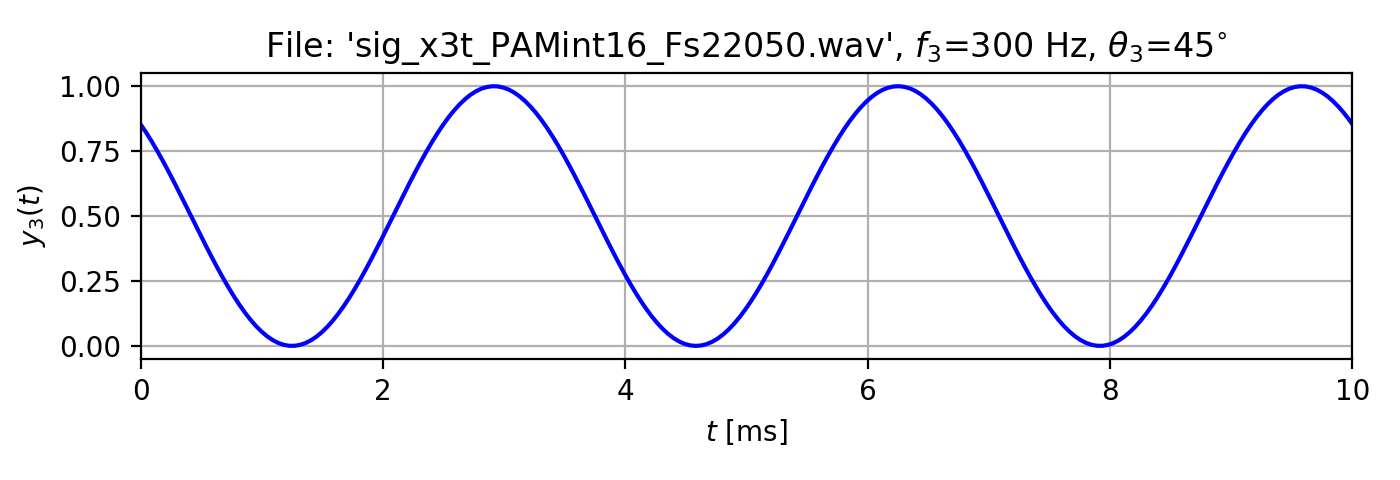

In [11]:
# Read back and display sinusoid 3
Fs3r, y3t = scwav.read(fn3)
print(type(y3t), y3t.dtype, y3t.size)
tty3 = np.arange(y3t.size)/float(Fs3r)
y3t = y3t/float(2**15)   # convert back to float
plt.figure(11, figsize=fsz2)
plt.plot(1e3*tty3, y3t, '-b')
plt.xlim([0, 10])
plt.title("File: '{}', $f_3$={} Hz, $\\theta_3$={}$^{{\\circ}}$".format(fn3, f3, theta3))
plt.ylabel('$y_3(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()

<class 'numpy.ndarray'> float32 162823


<IPython.core.display.Javascript object>


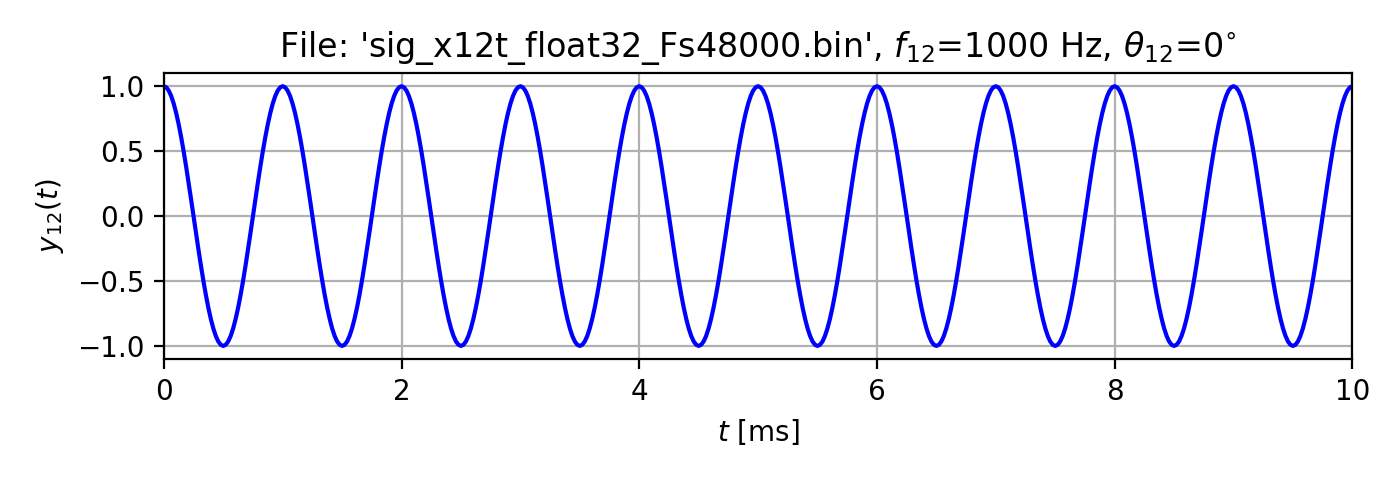

In [12]:
# Read back and display sinusoid 12 (generated by GRC 3.7)
Fs12 = 48000
f12 = 1000
theta12 = 0
fn12 = 'sig_x12t_float32_Fs48000.bin'
y12t = np.fromfile(fn12, dtype=np.float32)
print(type(y12t), y12t.dtype, y12t.size)
tty12 = np.arange(y12t.size)/float(Fs12)
plt.figure(15, figsize=fsz2)
plt.plot(1e3*tty12, y12t, '-b')
plt.xlim([0, 10])
plt.title("File: '{}', $f_{{12}}$={} Hz, $\\theta_{{12}}$={}$^{{\\circ}}$".format(fn12, f12, theta12))
plt.ylabel('$y_{{12}}(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()

<class 'numpy.ndarray'> int16 147462


<IPython.core.display.Javascript object>


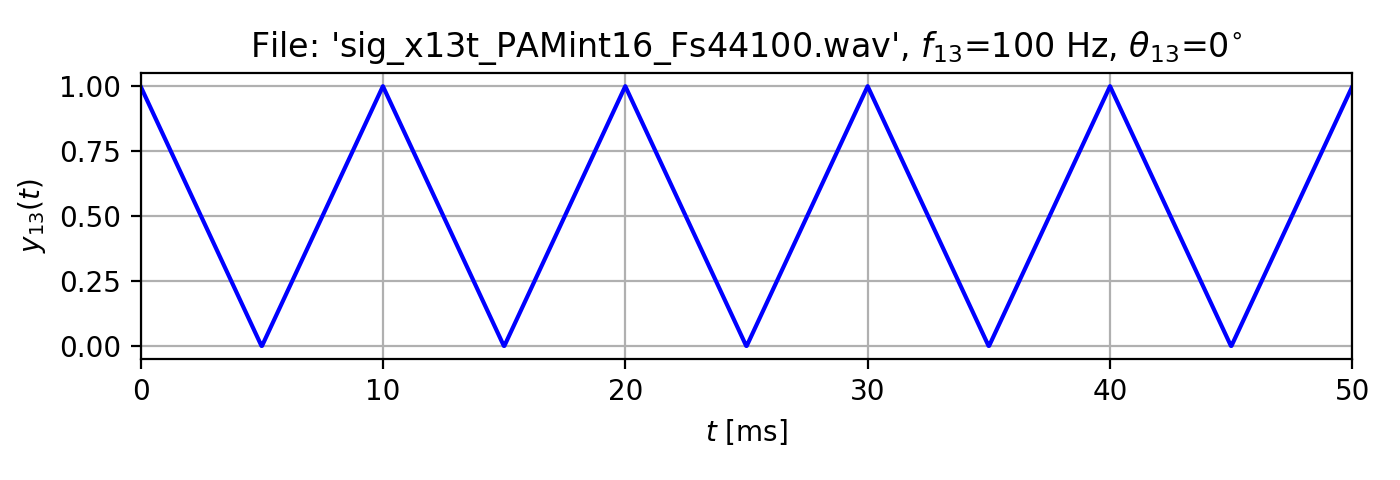

In [13]:
# Read back and display signal 13 (generated by GRC 3.7)
f13 = 100
theta13 = 0
fn13 = 'sig_x13t_PAMint16_Fs44100.wav'
Fs13r, y13t = scwav.read(fn13)
print(type(y13t), y13t.dtype, y13t.size)
tty13 = np.arange(y13t.size)/float(Fs13r)
y13t = y13t/float(2**15)   # convert back to float
plt.figure(19, figsize=fsz2)
plt.plot(1e3*tty13, y13t, '-b')
plt.xlim([0, 50])
plt.title("File: '{}', $f_{{13}}$={} Hz, $\\theta_{{13}}$={}$^{{\\circ}}$".format(fn13, f13, theta13))
plt.ylabel('$y_{{13}}(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()

<class 'numpy.ndarray'> float32 193545


<IPython.core.display.Javascript object>


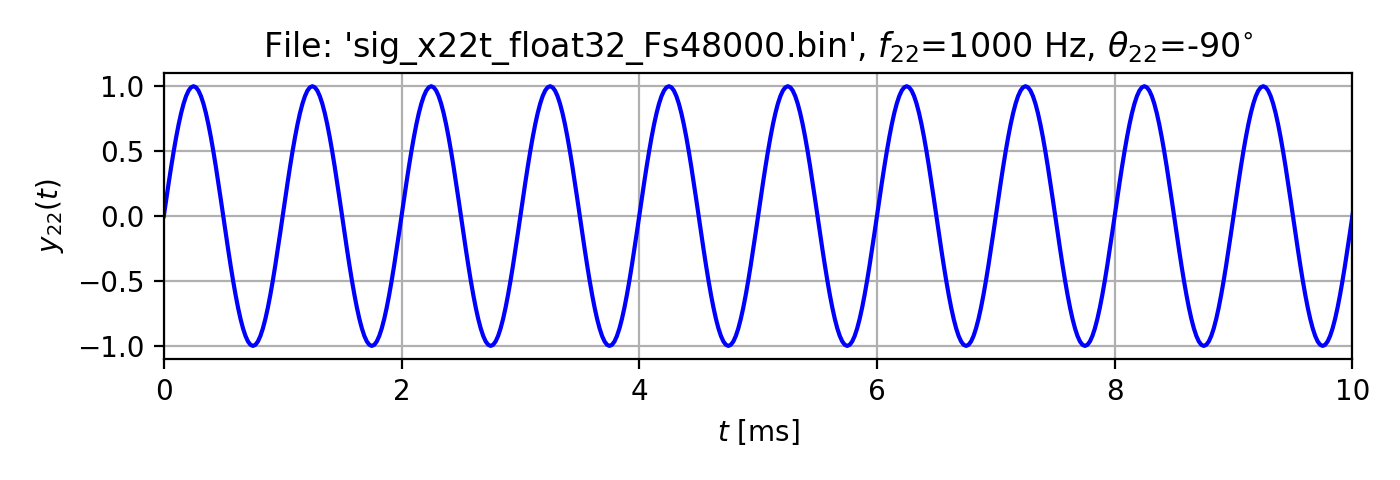

In [14]:
# Read back and display sinusoid 22 (generated by GRC 3.8)
Fs22 = 48000
f22 = 1000
theta22 = -90
fn22 = 'sig_x22t_float32_Fs48000.bin'
y22t = np.fromfile(fn22, dtype=np.float32)
print(type(y22t), y22t.dtype, y22t.size)
tty22 = np.arange(y22t.size)/float(Fs22)
plt.figure(23, figsize=fsz2)
plt.plot(1e3*tty22, y22t, '-b')
plt.xlim([0, 10])
plt.title("File: '{}', $f_{{22}}$={} Hz, $\\theta_{{22}}$={}$^{{\\circ}}$".format(fn22, f22, theta22))
plt.ylabel('$y_{{22}}(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()

<class 'numpy.ndarray'> int16 178184


<IPython.core.display.Javascript object>


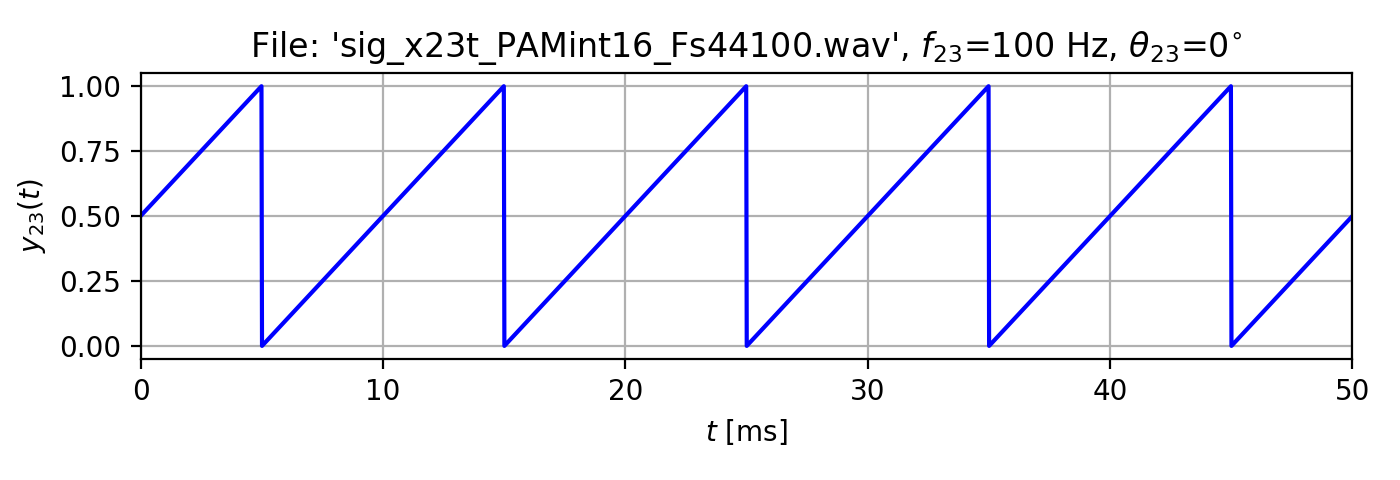

In [15]:
# Read back and display signal 23 (generated by GRC 3.8)
f23 = 100
theta23 = 0
fn23 = 'sig_x23t_PAMint16_Fs44100.wav'
Fs23r, y23t = scwav.read(fn23)
print(type(y23t), y23t.dtype, y23t.size)
tty23 = np.arange(y23t.size)/float(Fs23r)
y23t = y23t/float(2**15)   # convert back to float
plt.figure(27, figsize=fsz2)
plt.plot(1e3*tty23, y23t, '-b')
plt.xlim([0, 50])
plt.title("File: '{}', $f_{{23}}$={} Hz, $\\theta_{{23}}$={}$^{{\\circ}}$".format(fn23, f23, theta23))
plt.ylabel('$y_{{23}}(t)$')
plt.xlabel('$t$ [ms]')
plt.grid()
plt.tight_layout()